# Project: Investigate a Dataset - [No Show Appointments Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The No Show Appointments dataset describes the medical appointments of different patients and their dedication to the scheduled appointment. The dataset contains 110528 rows of information on specific attributes of each patient such as Age, Scheduled day, Appointment day,the kind of Neighbourhood and whether or not they recieved messages.


### Question(s) for Analysis
The dataset contains variables that can help me predict whether a patient would be present or miss an appointment. I will carry out an investigation by cleaning, exploring and visualizing the dataset to reach a conclusion. Certain questions like 'Does Age have a strong correlation to No-shows?', 'Will sending SMS help reduce No-shows?', 'Does gender have any correlation with No-shows'?. At the end of the investigation, i want to be able to make predictions that can assist the patients to meet up with appointments. 

In [1]:
# import the libraries needed for exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling


### General Properties
Here, load dataset, 
read dimensions, 
read columns summary, 
check for duplicates, 
and general information.

In [3]:
# Load and read the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check dimension
df.shape

(110527, 14)

In [5]:
#columns summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#check for duplicates
sum(df.duplicated())

0

In [7]:
#check general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#check datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


### Data Cleaning
There seems to be some errors in the dataset. 
Age has a -1 in its row. 
Some column headers have misspellings. 
Some columns have wrong datatypes. 
The column header 'No-Show' can be misleading, so i will assign an appropriate term 'Present'

In [10]:
#Check for row with -1 in Age column
#Drop row with wrong age number

df[df['Age'] < 0 ]
negative_age = df[df['Age'] < 0].index
df.drop(negative_age, inplace = True)

In [11]:
#check for change
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Invalid Age has been dropped.

In [12]:
#correcting misspelt column headers
#Check for changes
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [13]:
#change datatypes 
df['PatientId'] = df['PatientId'].astype('int64')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [14]:
for c in ['ScheduledDay', 'AppointmentDay']: df[c] = pd.to_datetime(df[c])
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Change No-show to Present
df.rename(columns= {'No-show':'Present'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Present
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df['Present'] = df['Present'].apply(lambda x: 1 if x=='No' else 0)

Check atleast 10 rows of the cleaned dataset to confirm all changes were implemented before Exploring and answering questions

In [17]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Present
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,1
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis
Start by checking the Present cases since that is the objective of the analysis.

### QUERY 1

In [18]:
#Confirm the present cases
df.Present.value_counts()

1    88207
0    22319
Name: Present, dtype: int64

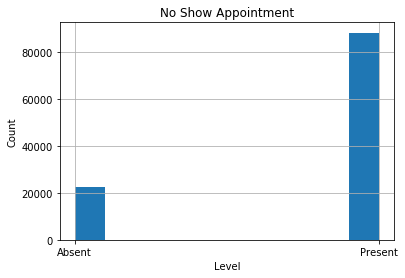

In [19]:
#Plot a histogram to visualize the difference to give a clearer understanding
df.Present.hist()
plt.title('No Show Appointment')
plt.ylabel('Count')
plt.xlabel('Level')
plt.xticks([0, 1], ['Absent', 'Present']);

The count of Absent cases is significantly lower than the count of Present cases.

The Absent case is approximately 20% while the Present case is approximately 80%. The analysis will be carried out by correlating Present case with Gender and SMS_received to see if these attributes have an effect on Present case.

In [20]:
#Check if Gender affects Absent case
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [21]:
df.groupby('Gender')['Present'].mean()

Gender
F    0.796851
M    0.800321
Name: Present, dtype: float64

In [22]:
#Plot function
def barchart(x, xlabel, ylabel, title):
 'Creates a barchart by passing in the required parameters'
 plt.xlabel(xlabel,size=5)
 plt.ylabel(ylabel, size=7)
 plt.title(title, size=10)

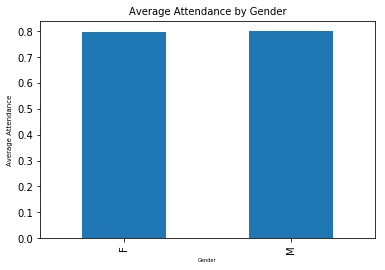

In [23]:
attendance_by_gender = df.groupby('Gender')['Present'].mean().plot(kind = 'bar')
barchart(attendance_by_gender, 'Gender', 'Average Attendance', 'Average Attendance by Gender')

## Does Gender have an effect on Attendance Rate?

### According to the barchart above, Gender has No significant effect on attendance rate. 

### Query 2

In [24]:
#Lets see if SMS recieved have an effect on Attendance
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [25]:
df.groupby('SMS_received')['Present'].mean()

SMS_received
0    0.832965
1    0.724255
Name: Present, dtype: float64

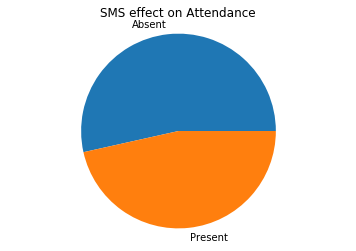

In [26]:
#Pictorial representation 
sizes = [0.832965,0.724255]
labels = ['Absent', 'Present']
plt.pie(sizes, labels = labels)
plt.title('SMS effect on Attendance')
plt.axis('equal')
plt.show()

Text(0,0.5,'SMS_received')

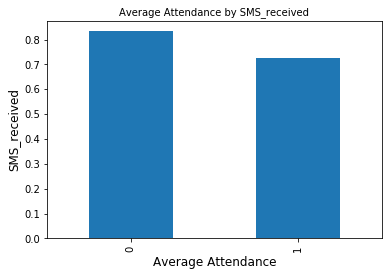

In [27]:
attendance_by_SMS = df.groupby('SMS_received')['Present'].mean().plot(kind = 'bar')
barchart(attendance_by_SMS, 'SMS_received', 'Average Attendance', 'Average Attendance by SMS_received');
plt.xlabel('Average Attendance', fontsize = 12)
plt.ylabel('SMS_received',fontsize = 12)

## Does SMS_received have an effect on Attendance rate?
#### Yes, it does. The SMS_received has significant effect on Present cases.

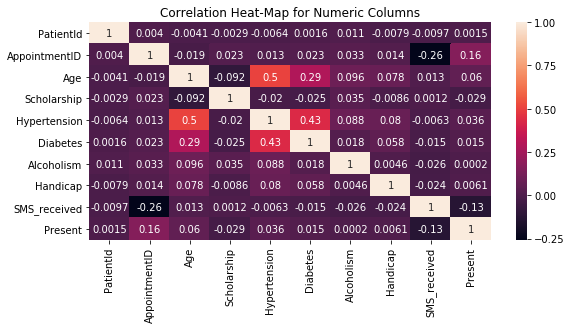

In [28]:
#Could there a correlation between the various diseases and Present rate?

plt.figure(figsize = (9,4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Heat-Map for Numeric Columns')
plt.show();

<a id='conclusions'></a>
## Conclusions

1. Gender of the patients have little effect on Show rate, Also, SMS_recieved has a significant effect on show rate.
2. Personally, i feel Neighborhood is a Number 1 factor in show rate but i could not analyse it because i do not have the distance of each neighborhood from the Hospital. Also, i did not feel the need to analyse each of the diseases as i do not know if they have had prior consultation and they are already in the recovery stage.
3. While viewing the dataset, the No-Show column was not easy to work with because the column header and the value it contains can be easily misinterpreted. Data cleaning is about adequate understanding of the analysis, so i had to change the Column header from No-show to Present, and the 'Yes' and 'No' to '0' and '1' respectively for proper understanding. 
4. The Clinic should further ask patients if they have any travel plans, to determine whether or not they will be in the neighborhood at the time of appointment. 

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0